In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (16,8)

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
df = pd.read_csv("TensorFlow_FILES/DATA/kc_house_data.csv")

In [46]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# EDA - Visualizations

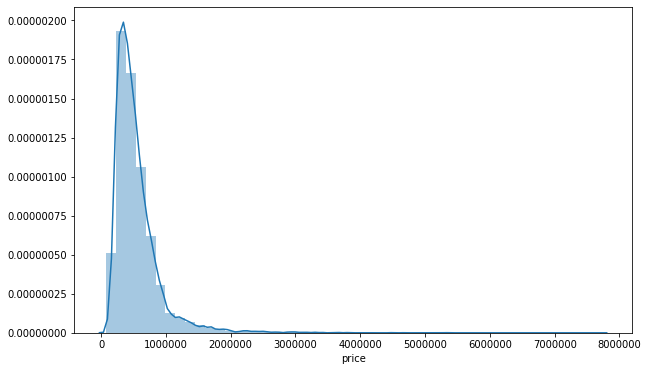

In [28]:
plt.figure(figsize=(10,6))
sns.distplot(df["price"])

In [68]:
df[df["price"]>2000000]["id"].count()

198

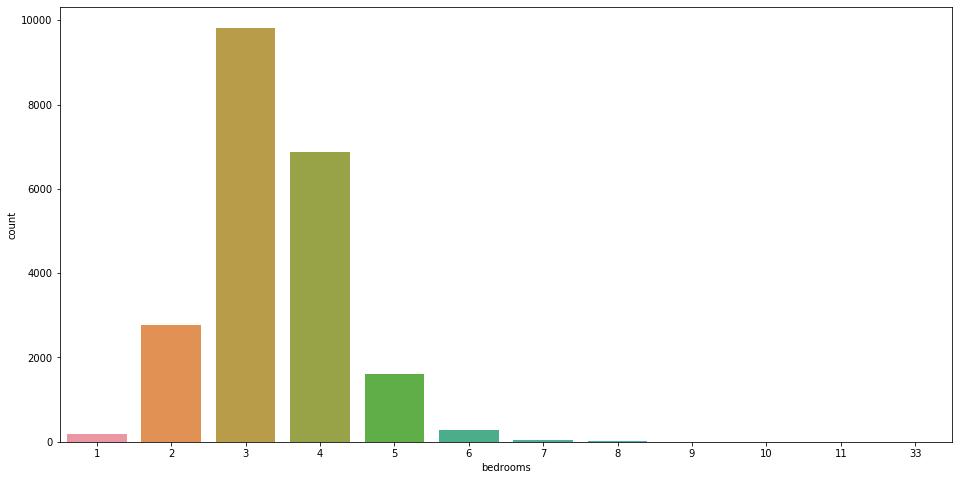

In [29]:
sns.countplot(df["bedrooms"])

In [17]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [21]:
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

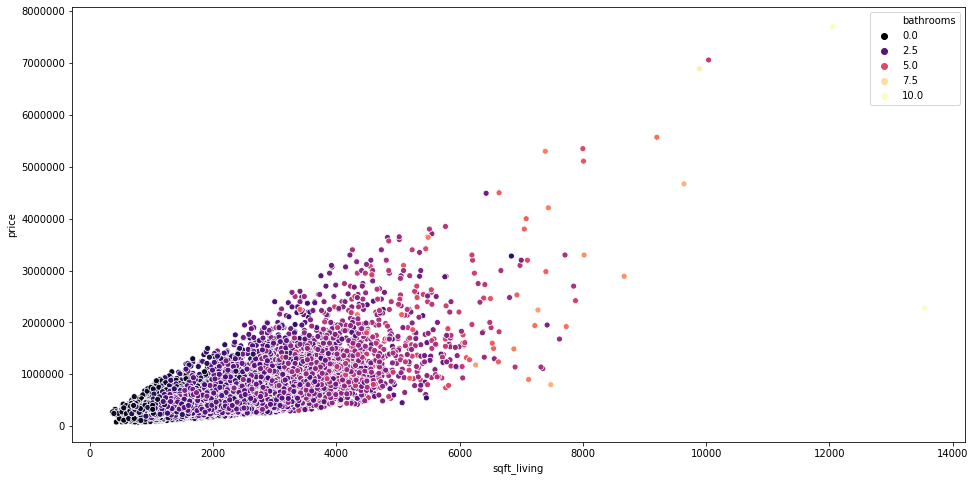

In [38]:
sns.scatterplot(x="sqft_living", y="price", data=df, hue="bathrooms", palette="magma")

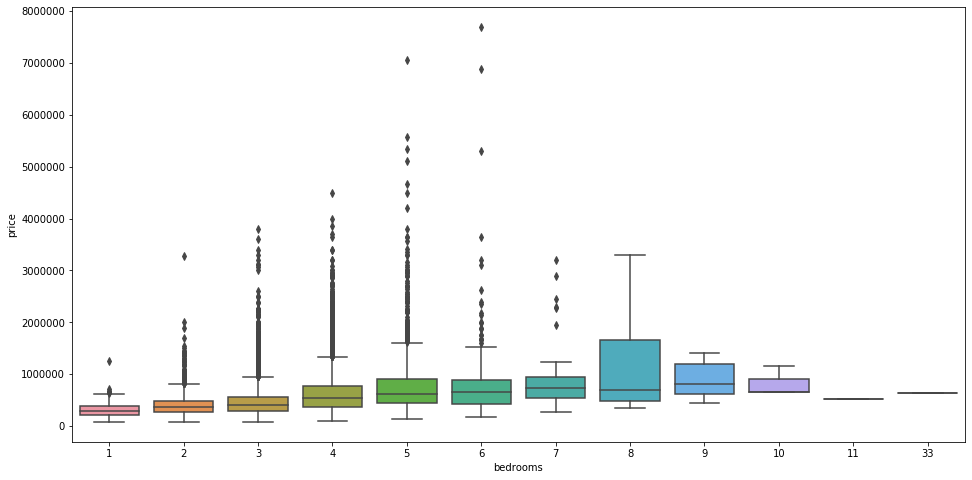

In [47]:
# plt.figure(figsize=(10,6))
sns.boxplot(x="bedrooms", y="price", data=df)

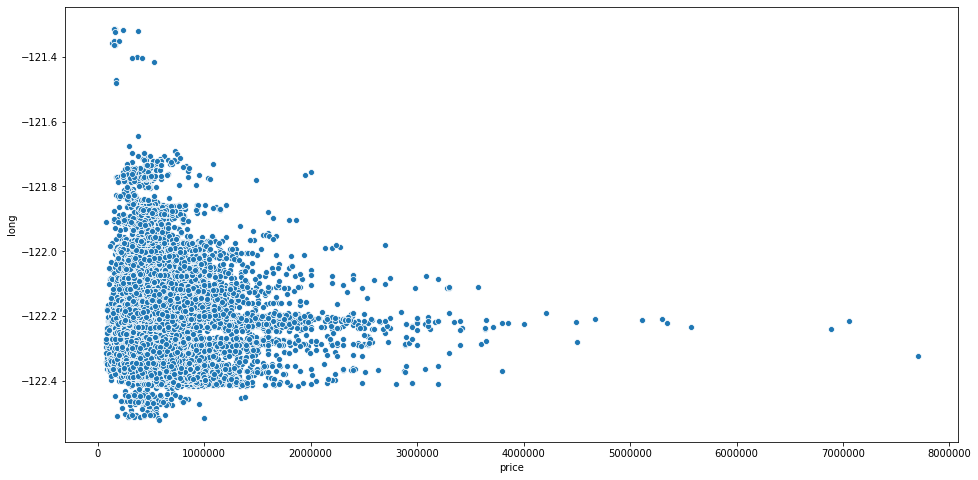

In [48]:
sns.scatterplot(x="price", y="long", data=df)

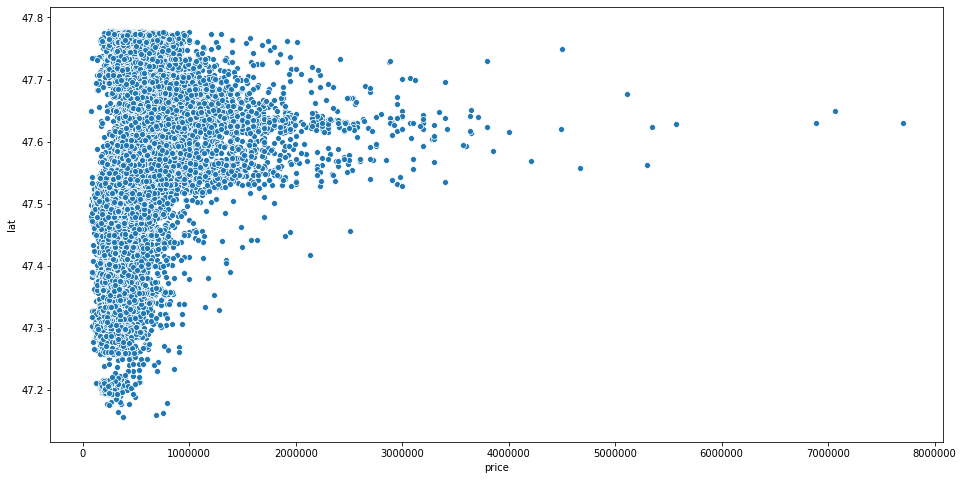

In [49]:
sns.scatterplot(x="price", y="lat", data=df)

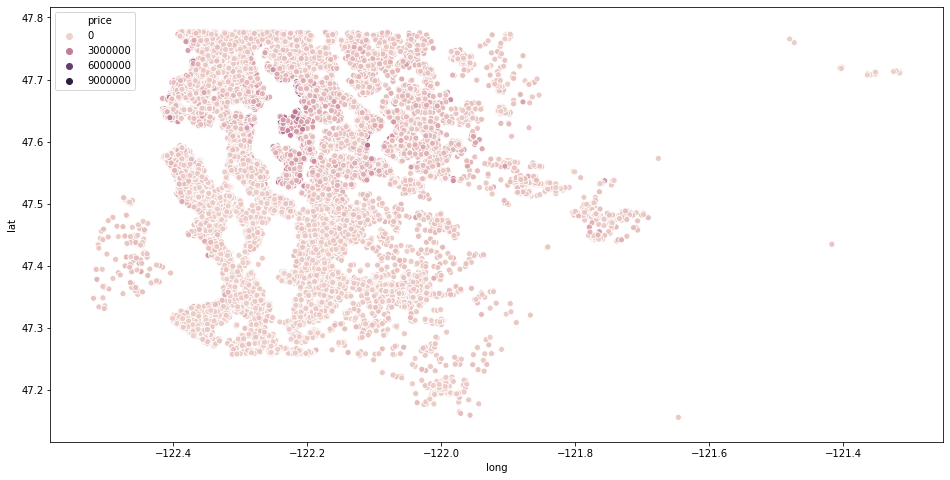

In [62]:
sns.scatterplot(x="long", y="lat", data=df, hue="price")

In [1]:
# from IPython.display import Image
# from IPython.core.display import HTML
# PATH = "C:\Users\AJ\JupyterNotebooks\DS & ML Python (Jose Portilla)\Refactored_Py_DS_ML_Bootcamp-master\22-Deep Learning"
# Image(filename = PATH + "king_county_map.png", width=100, height=100)

<img src="king_county_map.png" width=800 height=600 />

In [59]:
# <!-- ![king_county_map.png](attachment:king_county_map.png) -->
# Needs to be in a markdown cell to work! But you can't change the size of it. The previous code is better.

So, we can see that our most expensive houses are indeed at the locations indicated by the longitude & latitude maps. But the color isn't very good...this is because we have a lot of outlier prices. So, we can try to remove these outliers to get a better, more clear scatterplot.

In [66]:
df.sort_values(by="price", ascending=False).head(40)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [72]:
round(len(df)*0.01)

216

In [73]:
drop_1_percent = df.sort_values(by="price", ascending=False).iloc[217:]

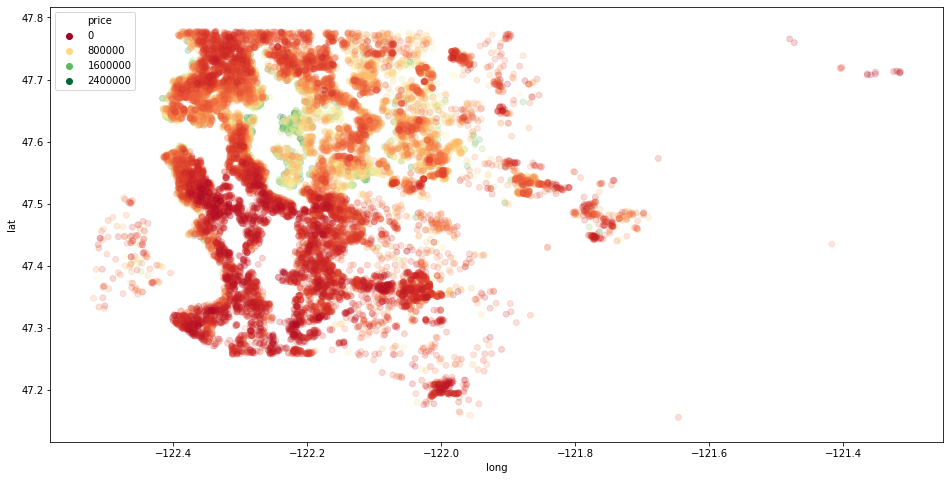

In [79]:
sns.scatterplot(x="long", y="lat", data=drop_1_percent,
                hue="price", edgecolor=None, alpha=0.2, palette="RdYlGn")

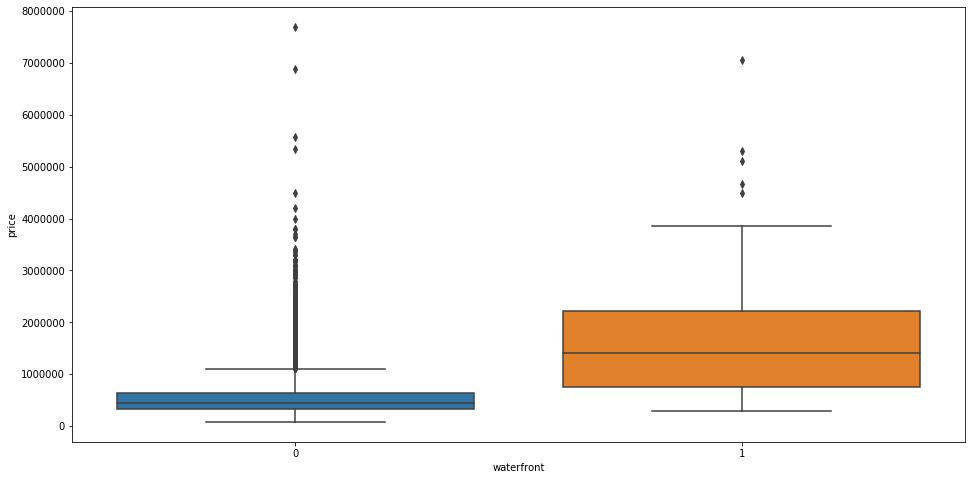

In [80]:
sns.boxplot(x="waterfront", y="price", data=df)

# Feature Engineering

In [81]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [82]:
df.drop("id", axis=1, inplace=True)

In [83]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [85]:
type(df["date"][1])

str

In [86]:
df["date"] = pd.to_datetime(df["date"])

In [89]:
type(df["date"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [95]:
df["date"][1].month

12

In [94]:
df["year"] = df["date"].apply(lambda x: x.year)

In [96]:
df["month"] = df["date"].apply(lambda x: x.month)

In [97]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


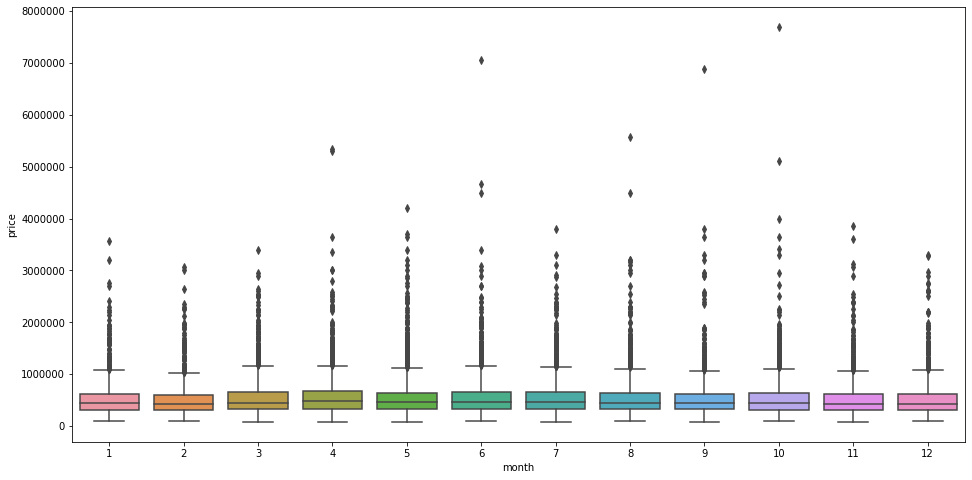

In [100]:
sns.boxplot(x="month", y="price", data=df)

In [113]:
price_by_month = df.groupby("month").mean()["price"]
price_by_month

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

In [112]:
price_by_month.describe()

count        12.000000
mean     537250.900853
std       15712.622959
min      508520.051323
25%      525672.414161
50%      538047.329854
75%      546381.557483
max      562215.615074
Name: price, dtype: float64

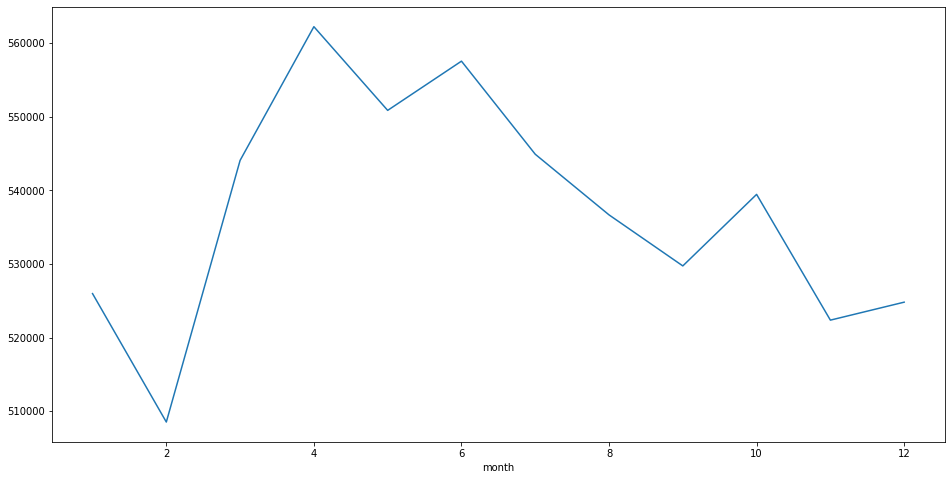

In [109]:
price_by_month.plot()

In [116]:
price_by_year = df.groupby("year").mean()["price"]
price_by_year
# Only two years -> Can't really get any insight from the year!

year
2014    539350.911777
2015    542279.005878
Name: price, dtype: float64

In [117]:
df.drop("date", axis=1, inplace=True)

In [118]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


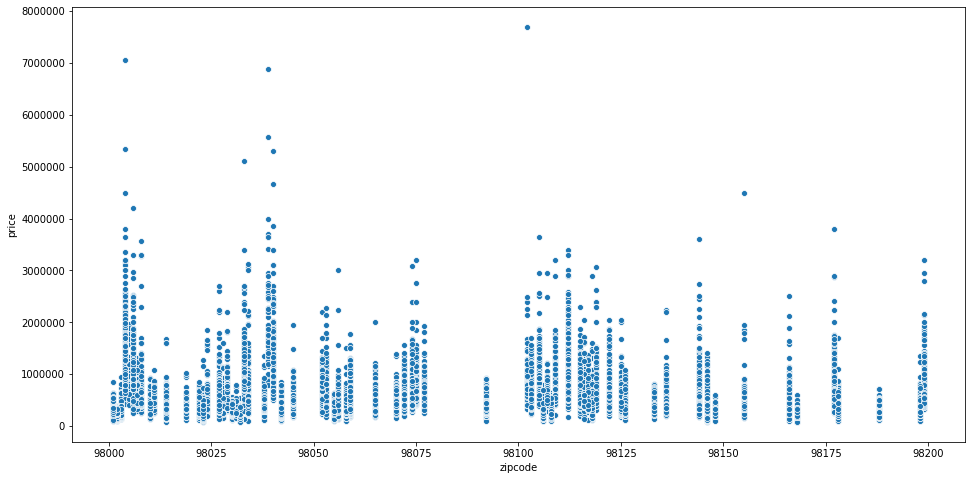

In [119]:
sns.scatterplot(x="zipcode", y="price", data=df)

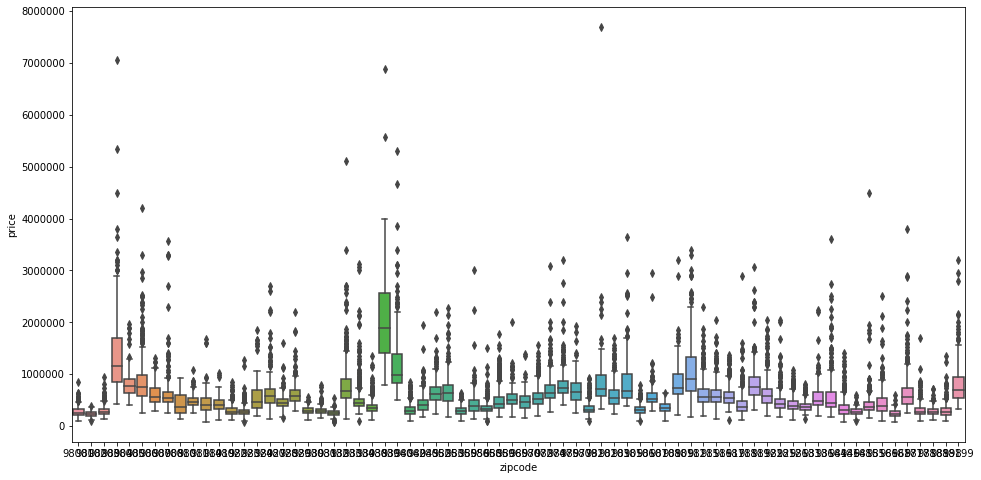

In [120]:
sns.boxplot(x="zipcode", y="price", data=df)

In [121]:
# We will just drop the zipbode column (not a high correlation with price; 70 unique codes -> hard to investigate without domain knowledge; would have to contact someone with domain knowledge to begin an understanding of it's affects on price; COULD also try and plot pricing at various zip codes on a geographical map to see if there is any relation )

df.drop("zipcode", axis=1, inplace=True)

In [131]:
boom = df["yr_renovated"].value_counts()
boom

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

(0, 1)

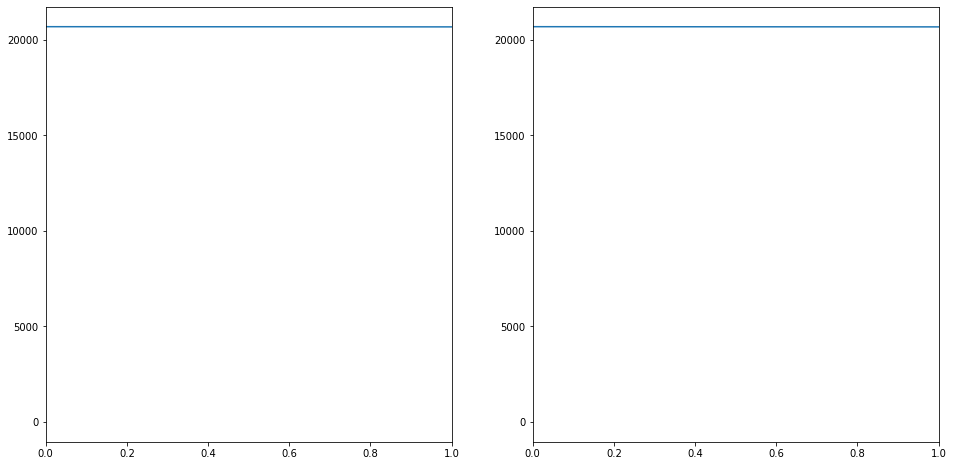

In [129]:
f, (ax, ax2) = plt.subplots(1, 2, sharex=True)

ax.plot(boom)
ax2.plot(boom)

# zoom-in / limit the view to different portions of the data
ax.set_xlim(1940, 2016)  # outliers only
ax2.set_xlim(0, 1)  # most of the data

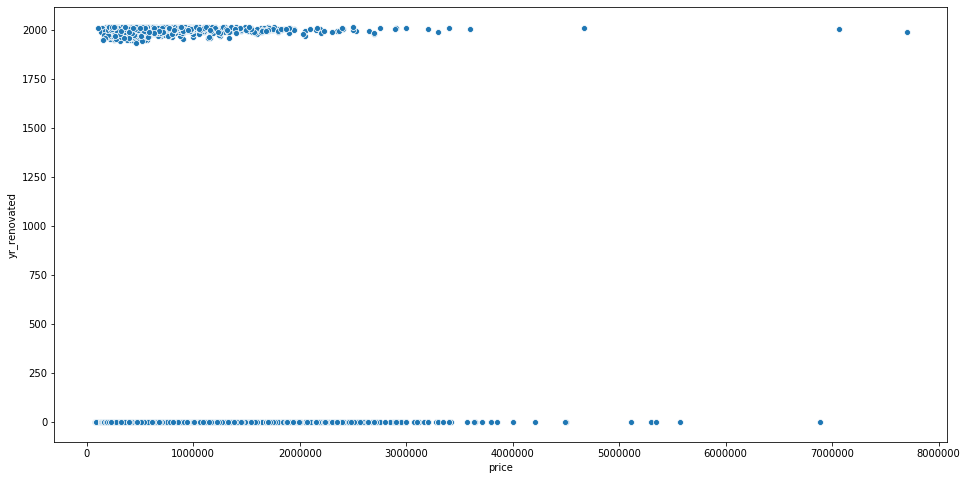

In [142]:
sns.scatterplot(x="price", y="yr_renovated", data=df)

In [147]:
yes_reno = df[df["yr_renovated"] != 0]
yes_reno.head()

no_reno = df[df["yr_renovated"] == 0]
no_reno.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
5,1230000.0,4,4.5,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930,2014,5


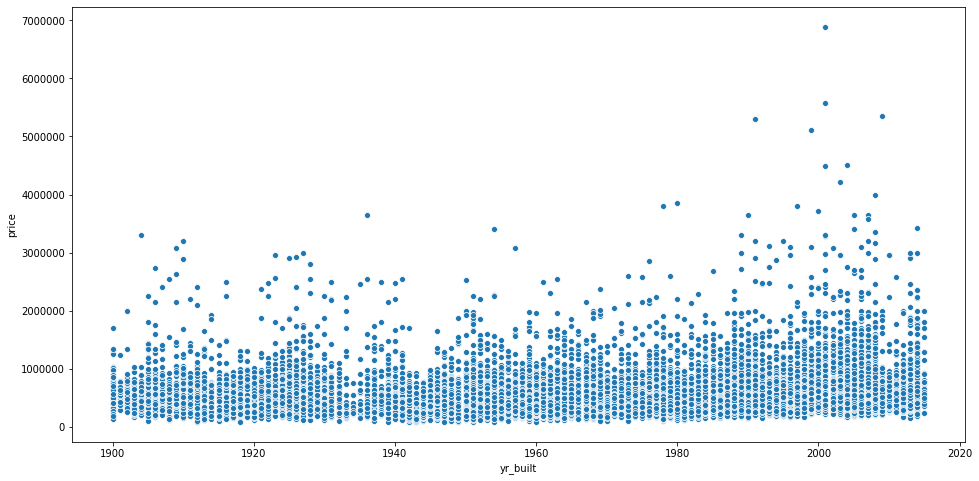

In [141]:
sns.scatterplot(x="yr_built", y="price", data=no_reno)

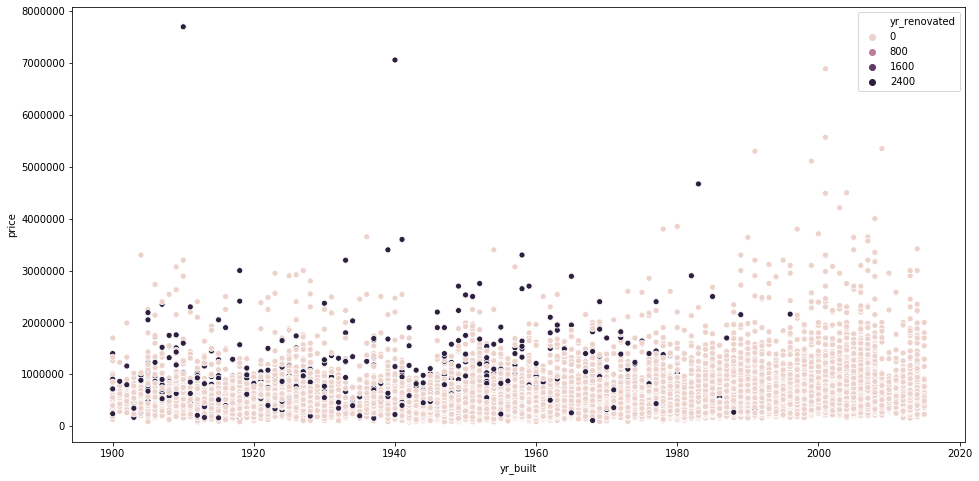

In [148]:
sns.scatterplot(x="yr_built", y="price", data=df, hue="yr_renovated")

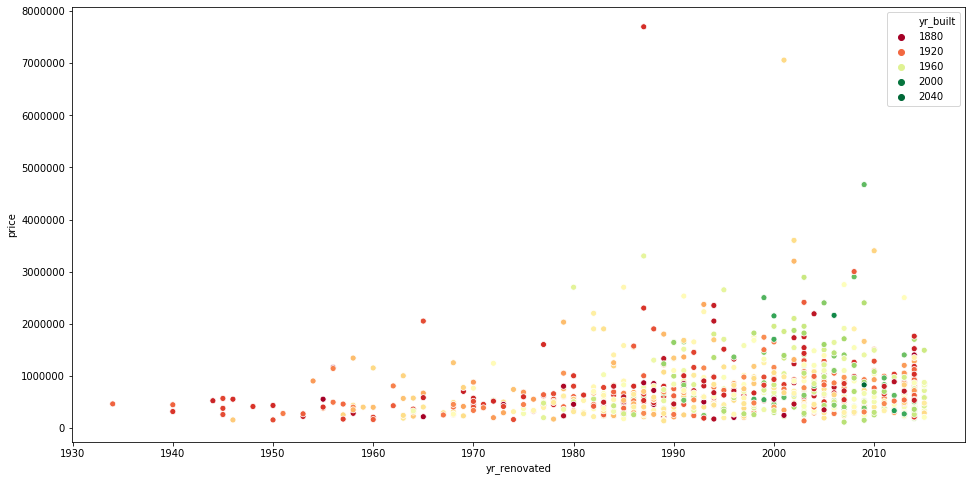

In [155]:
sns.scatterplot(x="yr_renovated", y="price", data=yes_reno, hue="yr_built", palette="RdYlGn")

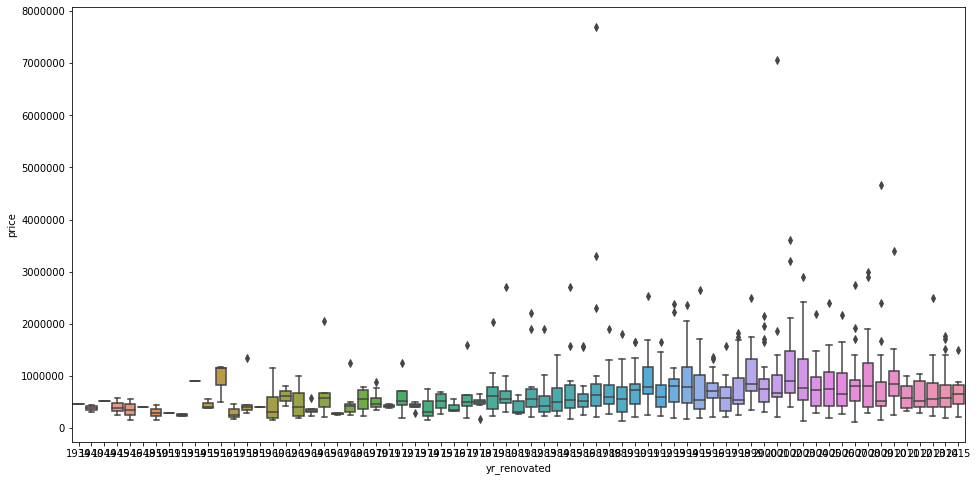

In [152]:
sns.boxplot(x="yr_renovated", y="price", data=yes_reno)

**Would need to investigate the year renovated further I think**

# Data Preprocessing & Model Creation

In [202]:
X = df.drop("price", axis=1).values
y = df["price"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

pandas.core.series.Series

In [159]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [160]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Construct the NN Model

In [163]:
model = Sequential()

In [165]:
# In practice, we can base the number of neurons per layer to the number of input features
X_train.shape # -> Hence, we will just 19 neurons per layer

(15117, 19)

In [168]:
model.add(Dense(units=19, activation="relu"))
model.add(Dense(units=19, activation="relu"))
model.add(Dense(units=19, activation="relu"))
model.add(Dense(units=19, activation="relu"))
model.add(Dense(units=1))

In [169]:
model.compile(optimizer="adam", loss="mse")

In [170]:
model.fit(x=X_train, y=y_train, batch_size=128, epochs=400, validation_data=(X_test, y_test))

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 62us/sample - loss: 430152419467.1345 - val_loss: 417023609737.1654
Epoch 2/400
15117/15117 [==============================] - 0s 19us/sample - loss: 194212684630.3155 - val_loss: 90693143372.4839
Epoch 3/400
15117/15117 [==============================] - 0s 20us/sample - loss: 87532570387.7288 - val_loss: 79037640835.4765
Epoch 4/400
15117/15117 [==============================] - 0s 21us/sample - loss: 73878381076.1521 - val_loss: 64441279222.5185
Epoch 5/400
15117/15117 [==============================] - 0s 20us/sample - loss: 59600160329.4622 - val_loss: 52137140239.1704
Epoch 6/400
15117/15117 [==============================] - 0s 25us/sample - loss: 50546287339.6954 - val_loss: 46040289371.0222
Epoch 7/400
15117/15117 [==============================] - 0s 31us/sample - loss: 45467388477.7435 - val_loss: 45135400363.2988
Epoch 8/400
15117/15117 [===========================

15117/15117 [==============================] - 0s 22us/sample - loss: 26614331380.2135 - val_loss: 25979289468.5235
Epoch 128/400
15117/15117 [==============================] - 0s 30us/sample - loss: 27055205740.4998 - val_loss: 25202487705.6000
Epoch 129/400
15117/15117 [==============================] - 0s 22us/sample - loss: 26583685596.8777 - val_loss: 24270556961.5012
Epoch 130/400
15117/15117 [==============================] - 0s 21us/sample - loss: 26389217306.5534 - val_loss: 24290145282.5284
Epoch 131/400
15117/15117 [==============================] - 0s 21us/sample - loss: 26651390819.0503 - val_loss: 25585443503.7235
Epoch 132/400
15117/15117 [==============================] - 0s 21us/sample - loss: 26684515583.9831 - val_loss: 24228612164.2667
Epoch 133/400
15117/15117 [==============================] - 0s 21us/sample - loss: 26415662751.7608 - val_loss: 24950037885.7877
Epoch 134/400
15117/15117 [==============================] - 0s 21us/sample - loss: 26324587273.0939 - v

15117/15117 [==============================] - 0s 22us/sample - loss: 16661966252.4787 - val_loss: 17773256061.7877
Epoch 254/400
15117/15117 [==============================] - 0s 22us/sample - loss: 16391536149.3037 - val_loss: 18089186822.3210
Epoch 255/400
15117/15117 [==============================] - 0s 23us/sample - loss: 16794546259.9955 - val_loss: 17205589626.6272
Epoch 256/400
15117/15117 [==============================] - 0s 23us/sample - loss: 16713983829.7736 - val_loss: 17280215272.6123
Epoch 257/400
15117/15117 [==============================] - 0s 22us/sample - loss: 16419780679.8026 - val_loss: 17133081430.5975
Epoch 258/400
15117/15117 [==============================] - 0s 22us/sample - loss: 16676588128.6964 - val_loss: 17333796889.2840
Epoch 259/400
15117/15117 [==============================] - 0s 23us/sample - loss: 16285187551.1808 - val_loss: 16804496684.8790
Epoch 260/400
15117/15117 [==============================] - 0s 23us/sample - loss: 16210639635.8643 - v

15117/15117 [==============================] - 0s 20us/sample - loss: 12584702419.9193 - val_loss: 15523644226.3704
Epoch 380/400
15117/15117 [==============================] - 0s 19us/sample - loss: 12340628943.6348 - val_loss: 15757916339.5160
Epoch 381/400
15117/15117 [==============================] - 0s 18us/sample - loss: 12689720763.8891 - val_loss: 15449001356.9580
Epoch 382/400
15117/15117 [==============================] - 0s 19us/sample - loss: 12359147919.3512 - val_loss: 15394466148.5037
Epoch 383/400
15117/15117 [==============================] - 0s 19us/sample - loss: 12262087290.1660 - val_loss: 15454359559.5852
Epoch 384/400
15117/15117 [==============================] - 0s 19us/sample - loss: 12367475003.9992 - val_loss: 16075693238.0444
Epoch 385/400
15117/15117 [==============================] - 0s 19us/sample - loss: 12676705633.9327 - val_loss: 15252576658.0148
Epoch 386/400
15117/15117 [==============================] - 0s 20us/sample - loss: 12450406980.4157 - v

# Evaluate Model

In [171]:
model.history.history

{'loss': [430152419467.13446,
  194212684630.31555,
  87532570387.72878,
  73878381076.15215,
  59600160329.4622,
  50546287339.69544,
  45467388477.74347,
  44195573114.86036,
  40774434031.31944,
  39406181254.951645,
  38182464112.14077,
  37298888217.57121,
  36759884342.56321,
  35936504677.08249,
  35047691429.75564,
  34623858525.29259,
  34135430524.72316,
  33565736593.67123,
  33464565990.5812,
  33377922750.784943,
  32990025081.09916,
  32694884334.38804,
  32581859500.732685,
  32014781973.3037,
  32206953701.83608,
  31597837817.53099,
  31438692991.856056,
  31320445229.570946,
  31068849740.44268,
  31324799824.083614,
  31340738068.4231,
  31052489971.925648,
  30850620677.80856,
  30811964780.364357,
  30384805399.471325,
  30168606955.32288,
  30603423384.44506,
  31747724546.96355,
  31715014889.968117,
  30447138426.233776,
  30108493019.539856,
  30006306522.354435,
  29948197408.751472,
  29925114175.86029,
  29604851030.518753,
  29640859062.605545,
  2963216529

In [173]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,4.301524e+11,4.170236e+11
1,1.942127e+11,9.069314e+10
2,8.753257e+10,7.903764e+10
3,7.387838e+10,6.444128e+10
4,5.960016e+10,5.213714e+10
...,...,...
395,1.218269e+10,1.532654e+10
396,1.209251e+10,1.495466e+10
397,1.192881e+10,1.539035e+10
398,1.236340e+10,1.566461e+10


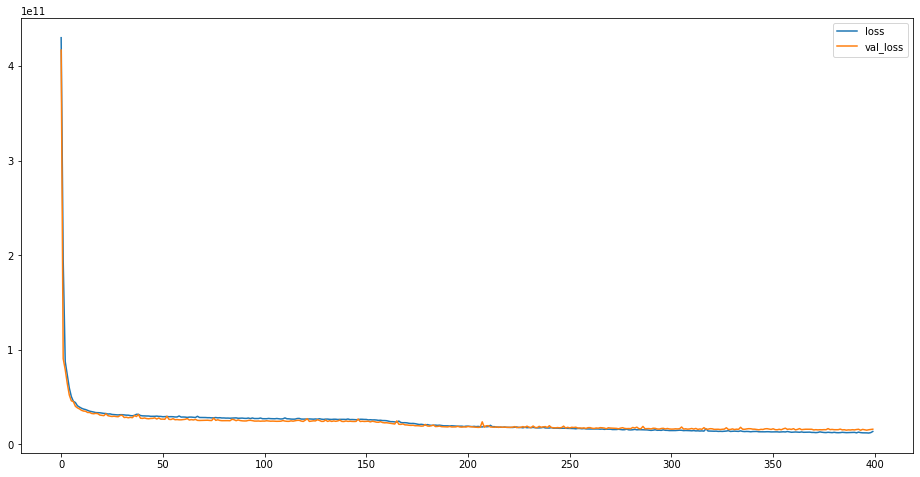

In [174]:
losses.plot()

Since val_loss decreases steadily, we can conclude that our model is not over-fitting to the data! So, we COULD keep training our model (w.r.t number of epochs) if we wanted to. 

If you see an increaes in val_loss, this indicates over-fitting -> you should implement "early stopping"

In [176]:
predictions = model.predict(X_test)

In [177]:
mean_squared_error(predictions, y_test)

15981033896.072569

In [178]:
mean_absolute_error(predictions, y_test)

74299.44478443287

In [179]:
np.sqrt(mean_squared_error(predictions, y_test))

126416.11406807507

In [182]:
df.describe()["price"].astype('int64')

count      21597
mean      540296
std       367368
min        78000
25%       322000
50%       450000
75%       645000
max      7700000
Name: price, dtype: int64

In [185]:
74299.44478443287/540296

0.13751618517337325

In [186]:
explained_variance_score(predictions, y_test)

0.8786265065567266

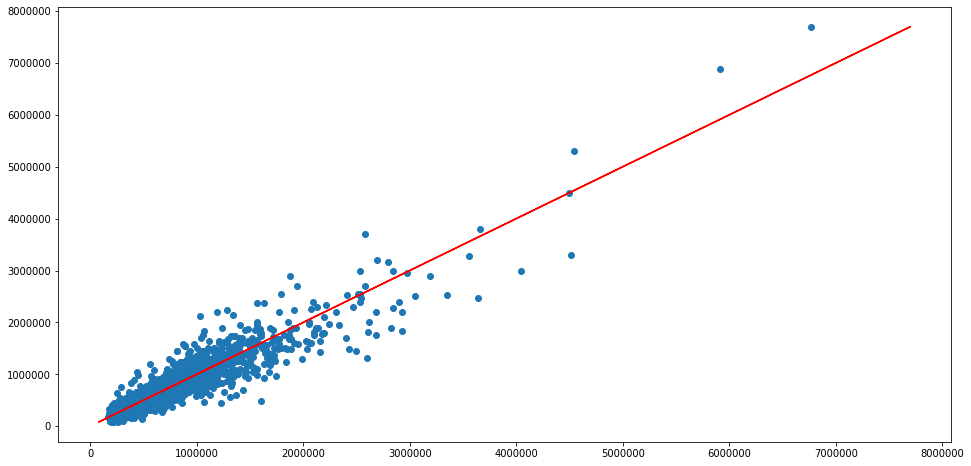

In [193]:
plt.scatter(predictions, y_test)
plt.plot(y_test,y_test,'r')

# Using the Model to Make Predictions

For our pedagogical purposes, we will just take the features from the first row of data in our original dataframe to be our "new" data.

In [197]:
new_house = df.drop("price", axis=1).iloc[0]
new_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [198]:
new_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [208]:
# Need to change the shape, so that it is within another array

new_house = new_house.values.reshape(-1,19)
new_house

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [209]:
new_house_scaled = scaler.transform(new_house)
new_house_scaled

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [210]:
model.predict(new_house_scaled)

array([[242312.17]], dtype=float32)

In [211]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


Actual price = 221900.0
Predicted price = 242312.17

So, it's not a bad prediction! But it is over-prediction. So, we could try to re-train our model after removing the top 1% of houses (as mentioned previously), and see if that gives us a better MSE